In [1]:
from __future__ import division
from sippy import *
import numpy as np
import control.matlab as cnt
from sippy import functionset as fset

## Data Generation

In [2]:
var_list = [50., 100., 1.]
ts = 1.

NUM11 = [4, 3.3, 0., 0.]
NUM12 = [10, 0., 0.]
NUM13 = [7.0, 5.5, 2.2]
NUM14 = [-0.9, -0.11, 0., 0.]
DEN1 = [1., -0.3, -0.25, -0.021, 0., 0.]
H1 = [1., 0.85, 0.32, 0., 0., 0.]
na1 = 3
nb11 = 2
nb12 = 1
nb13 = 3
nb14 = 2
th11 = 1
th12 = 2
th13 = 2
th14 = 1
nc1 = 2
#
DEN2 = [1., -0.4, 0., 0., 0.]
NUM21 = [-85, -57.5, -27.7]
NUM22 = [71, 12.3]
NUM23 = [-0.1, 0., 0., 0.]
NUM24 = [0.994, 0., 0., 0.]
H2 = [1., 0.4, 0.05, 0., 0.]
na2 = 1
nb21 = 3
nb22 = 2
nb23 = 1
nb24 = 1
th21 = 1
th22 = 2
th23 = 0
th24 = 0
nc2 = 2
#
DEN3 = [1., -0.1, -0.3, 0., 0.]
NUM31 = [0.2, 0., 0., 0.]
NUM32 = [0.821, 0.432, 0.]
NUM33 = [0.1, 0., 0., 0.]
NUM34 = [0.891, 0.223]
H3 = [1., 0.7, 0.485, 0.22, 0.]
na3 = 2
nb31 = 1
nb32 = 2
nb33 = 1
nb34 = 2
th31 = 0
th32 = 1
th33 = 0
th34 = 2
nc3 = 3

In [3]:
# SISO transfer functions (G and H)
g_sample11 = cnt.tf(NUM11, DEN1, ts)
g_sample12 = cnt.tf(NUM12, DEN1, ts)
g_sample13 = cnt.tf(NUM13, DEN1, ts)
g_sample14 = cnt.tf(NUM14, DEN1, ts)

g_sample22 = cnt.tf(NUM22, DEN2, ts)
g_sample21 = cnt.tf(NUM21, DEN2, ts)
g_sample23 = cnt.tf(NUM23, DEN2, ts)
g_sample24 = cnt.tf(NUM24, DEN2, ts)

g_sample31 = cnt.tf(NUM31, DEN3, ts)
g_sample32 = cnt.tf(NUM32, DEN3, ts)
g_sample33 = cnt.tf(NUM33, DEN3, ts)
g_sample34 = cnt.tf(NUM34, DEN3, ts)

H_sample1 = cnt.tf(H1, DEN1, ts)
H_sample2 = cnt.tf(H2, DEN2, ts)
H_sample3 = cnt.tf(H3, DEN3, ts)

In [4]:
# time
tfin = 400
npts = int(tfin/ts) + 1
Time = np.linspace(0, tfin, npts)

In [5]:
#INPUT#
Usim = np.zeros((4, npts))
Usim_noise = np.zeros((4, npts))
Usim[0],_,_ = fset.GBN_seq(npts, 0.03, Range = [-0.33, 0.1])
Usim[1],_,_ = fset.GBN_seq(npts, 0.03)
Usim[2],_,_ = fset.GBN_seq(npts, 0.03, Range = [2.3, 5.7])
Usim[3],_,_ = fset.GBN_seq(npts, 0.03, Range = [8., 11.5])

In [6]:
Usim

array([[-0.33, -0.33, -0.33, ..., -0.33, -0.33,  0.1 ],
       [-1.  , -1.  , -1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 5.7 ,  5.7 ,  5.7 , ...,  2.3 ,  2.3 ,  2.3 ],
       [11.5 , 11.5 , 11.5 , ..., 11.5 ,  8.  ,  8.  ]])

In [7]:
# Adding noise
err_inputH = np.zeros((4, npts))
err_inputH = fset.white_noise_var(npts, var_list)

In [8]:
err_inputH

array([[  8.44487663,   8.20177069, -14.52029592, ...,  -6.676921  ,
        -11.3170371 ,   1.18298448],
       [ -8.44589021,  -9.72482987,   3.51803193, ..., -12.00365746,
         -3.27900843,  -7.66249456],
       [  0.15837539,   0.56939321,  -0.26682914, ...,  -0.66852683,
         -0.06446885,  -0.61793666]])

In [9]:
err_outputH1, Time, Xsim = cnt.lsim(H_sample1, err_inputH[0], Time)
err_outputH2, Time, Xsim = cnt.lsim(H_sample2, err_inputH[1], Time)
err_outputH3, Time, Xsim = cnt.lsim(H_sample3, err_inputH[2], Time)

c:\ProgramData\anaconda3\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


In [10]:
# OUTPUTS
Yout = np.zeros((3, npts))
# Noise-free output
Yout11, Time, Xsim = cnt.lsim(g_sample11, Usim[0], Time)
Yout12, Time, Xsim = cnt.lsim(g_sample12, Usim[1], Time)
Yout13, Time, Xsim = cnt.lsim(g_sample13, Usim[2], Time)
Yout14, Time, Xsim = cnt.lsim(g_sample14, Usim[3], Time)
Yout21, Time, Xsim = cnt.lsim(g_sample21, Usim[0], Time)
Yout22, Time, Xsim = cnt.lsim(g_sample22, Usim[1], Time)
Yout23, Time, Xsim = cnt.lsim(g_sample23, Usim[2], Time)
Yout24, Time, Xsim = cnt.lsim(g_sample24, Usim[3], Time)
Yout31, Time, Xsim = cnt.lsim(g_sample31, Usim[0], Time)
Yout32, Time, Xsim = cnt.lsim(g_sample32, Usim[1], Time)
Yout33, Time, Xsim = cnt.lsim(g_sample33, Usim[2], Time)
Yout34, Time, Xsim = cnt.lsim(g_sample34, Usim[3], Time)

In [11]:
# Total output
Ytot1 = Yout11 + Yout12 + Yout13 + Yout14
Ytot2 = Yout21 + Yout22 + Yout23 + Yout24
Ytot3 = Yout31 + Yout32 + Yout33 + Yout34

Ytot = np.zeros((3, npts))

Ytot[0] = (Ytot1 + err_outputH1).squeeze()
Ytot[1] = (Ytot2 + err_outputH2).squeeze()
Ytot[2] = (Ytot3 + err_outputH3).squeeze()

In [12]:
Ytot

array([[ 8.44487663e+00,  1.79133788e+01, -9.03119751e+00, ...,
         5.67107846e+01,  4.52902700e+01,  4.83594273e+01],
       [-8.44589021e+00, -5.62054204e+00,  3.58685887e+01, ...,
         2.40413745e+02,  2.38980697e+02,  2.33205998e+02],
       [ 1.58375388e-01,  1.20009352e+00,  5.90801398e-02, ...,
         2.50619820e+01,  2.49403274e+01,  2.35870496e+01]])

In [13]:
Usim

array([[-0.33, -0.33, -0.33, ..., -0.33, -0.33,  0.1 ],
       [-1.  , -1.  , -1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 5.7 ,  5.7 ,  5.7 , ...,  2.3 ,  2.3 ,  2.3 ],
       [11.5 , 11.5 , 11.5 , ..., 11.5 ,  8.  ,  8.  ]])

## System Identification

In [14]:
ordersna = [na1, na2, na3]
ordersnb = [[nb11, nb12, nb13, nb14], [nb21, nb22, nb23, nb24], [nb31, nb32, nb33, nb34]]
ordersnc = [nc1, nc2, nc3]
theta_list = [[th11, th12, th13, th14], [th21, th22, th23, th24], [th31, th32, th33, th34]]

In [15]:
print(ordersna)
print(ordersnb)
print(ordersnc)
print(theta_list)

[3, 1, 2]
[[2, 1, 3, 2], [3, 2, 1, 1], [1, 2, 1, 2]]
[2, 2, 3]
[[1, 2, 2, 1], [1, 2, 0, 0], [0, 1, 0, 2]]


In [16]:
# IDENTIFICATION STAGE
# TESTING ARMAX models
# iterative LLS
Id_ARMAXi = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders=[ordersna, ordersnb, ordersnc, theta_list], 
                                  max_iterations=20, centering = 'MeanVal')  #
# optimization-based
Id_ARMAXo = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders=[ordersna, ordersnb, ordersnc, theta_list], 
                                  ARMAX_mod = 'OPT', max_iterations=20, centering = 'None')  #
# recursive LLS
Id_ARMAXr = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders=[ordersna, ordersnb, ordersnc, theta_list], 
                                  ARMAX_mod = 'RLLS', max_iterations=20, centering = 'InitVal')  #

Warning! Reached maximum iterations
at  1 ° output
-------------------------------------


In [17]:
Id_ARMAXi.Yid

array([[ 8.44487663e+00,  1.79133788e+01, -9.03119751e+00, ...,
         6.38884463e+01,  5.69694444e+01,  4.74208476e+01],
       [-8.44589021e+00, -5.62054204e+00,  3.58685887e+01, ...,
         2.51053418e+02,  2.40929574e+02,  2.40997136e+02],
       [ 1.58375388e-01,  1.20009352e+00,  5.90801398e-02, ...,
         2.55893557e+01,  2.49494456e+01,  2.42183687e+01]])

In [18]:
# output of the identified model
Yout_ARMAXi = Id_ARMAXi.Yid
Yout_ARMAXo = Id_ARMAXo.Yid
Yout_ARMAXr = Id_ARMAXr.Yid

---

In [19]:
import matplotlib.pyplot as plt

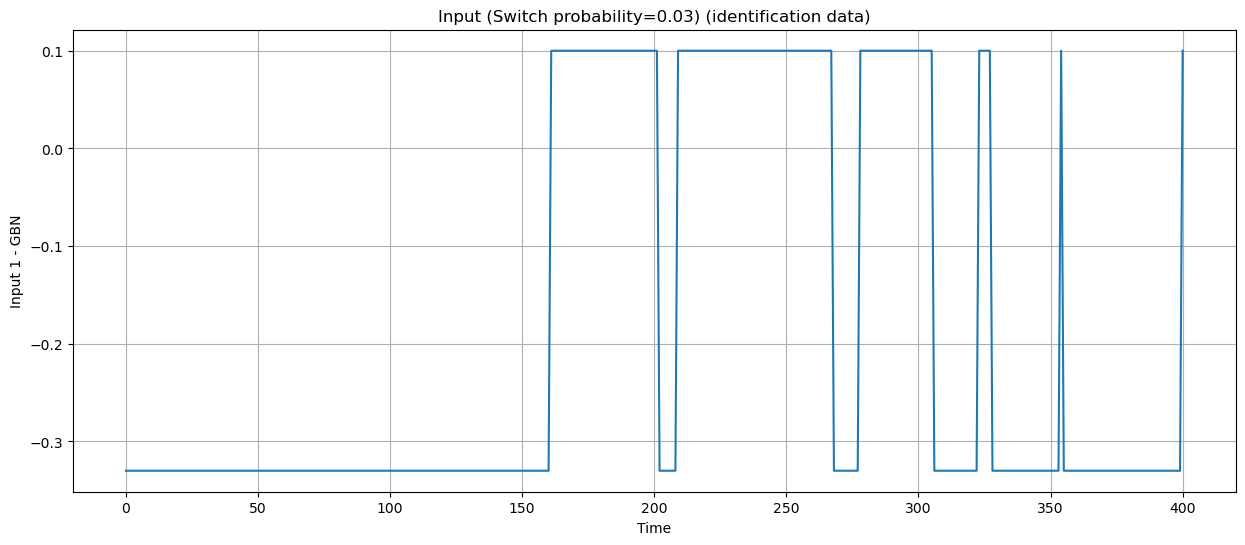

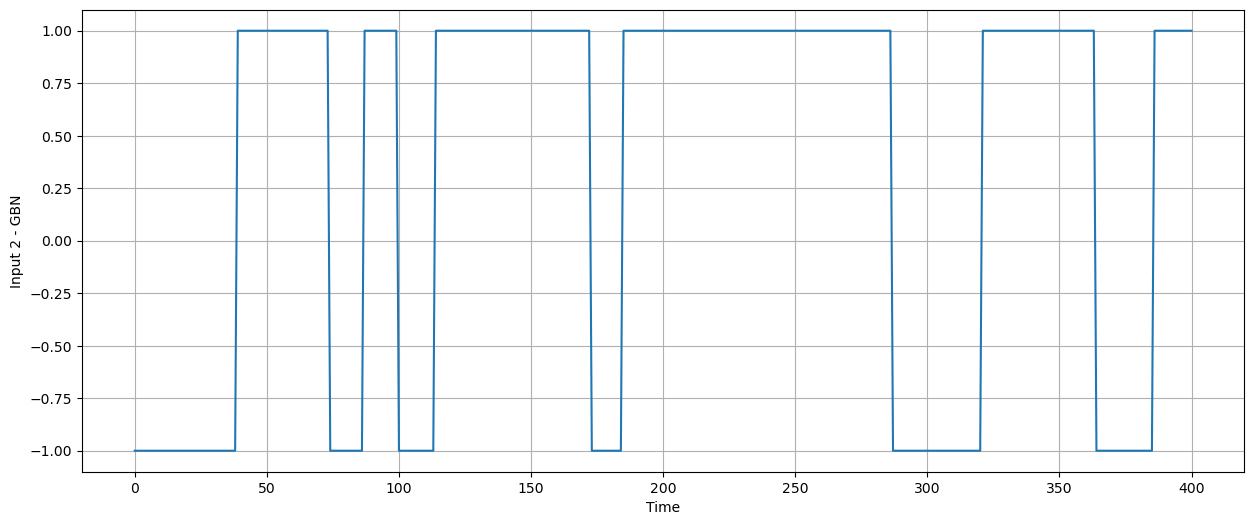

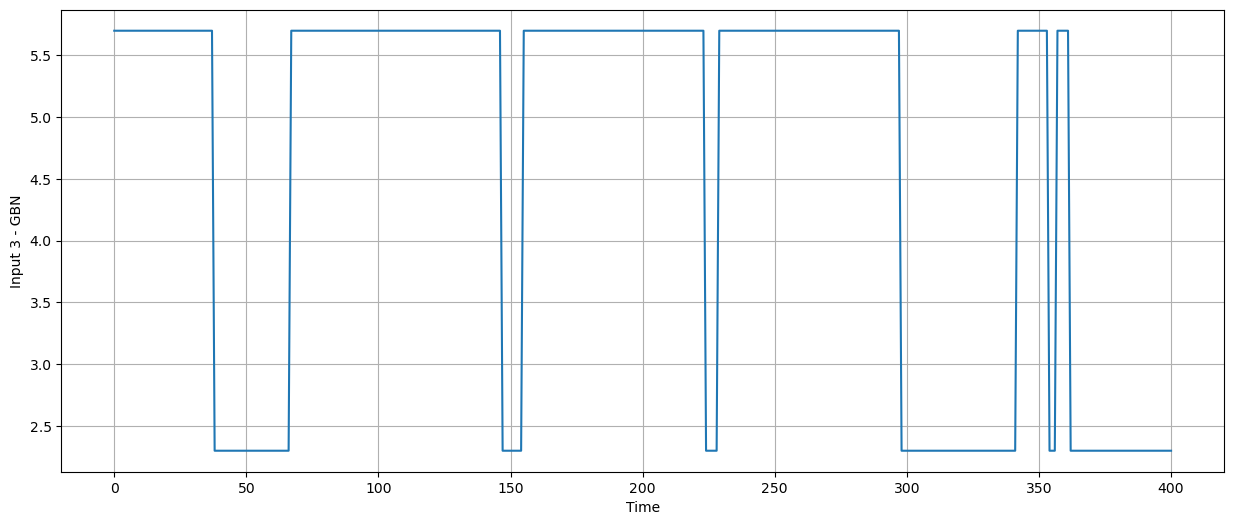

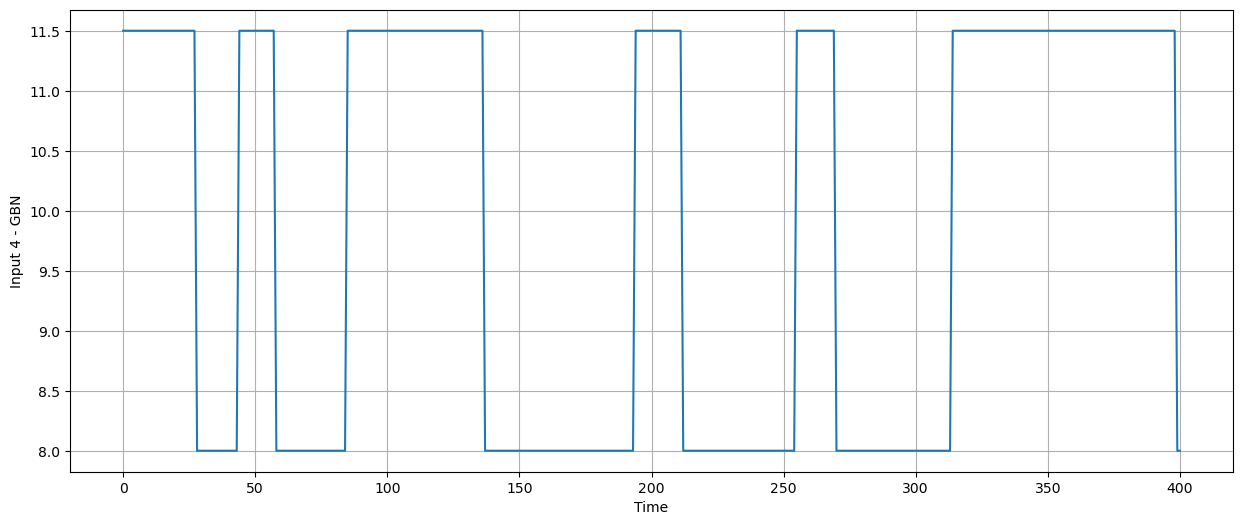

In [20]:
# U
plt.figure(figsize=(15, 6))
plt.plot(Time, Usim[0])
plt.grid()
plt.ylabel("Input 1 - GBN")
plt.xlabel("Time")
plt.title("Input (Switch probability=0.03) (identification data)")
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Usim[1])
plt.grid()
plt.ylabel("Input 2 - GBN")
plt.xlabel("Time")
plt.show()

plt.figure(figsize=(15, 6))
# plt.subplot(4, 1, 3)
plt.plot(Time, Usim[2])
plt.ylabel("Input 3 - GBN")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Usim[3])
plt.ylabel("Input 4 - GBN")
plt.xlabel("Time")
plt.grid()
plt.show()

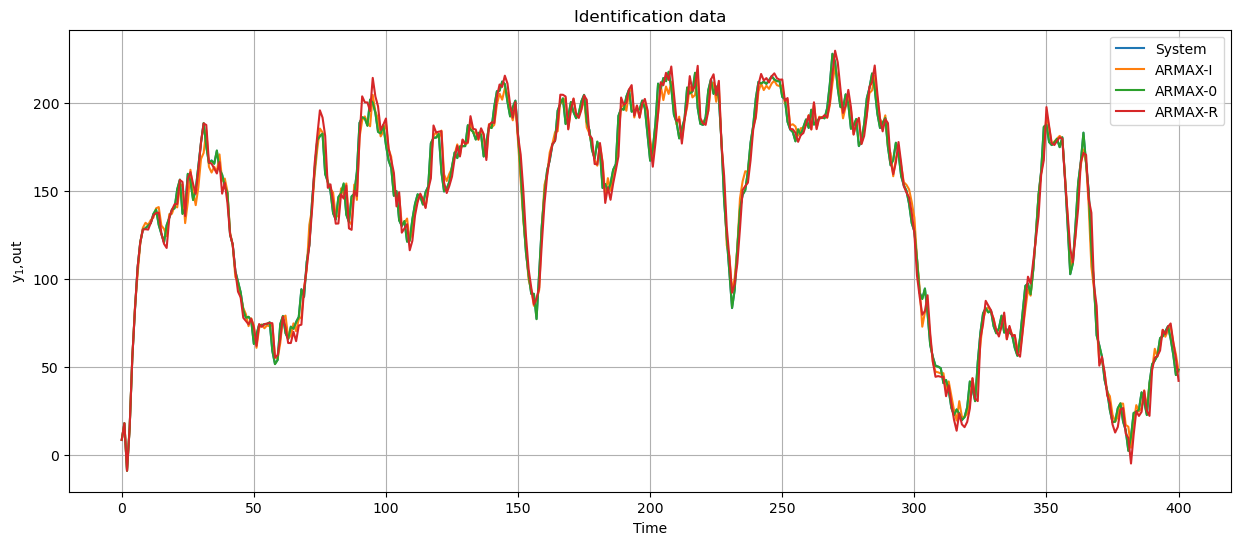

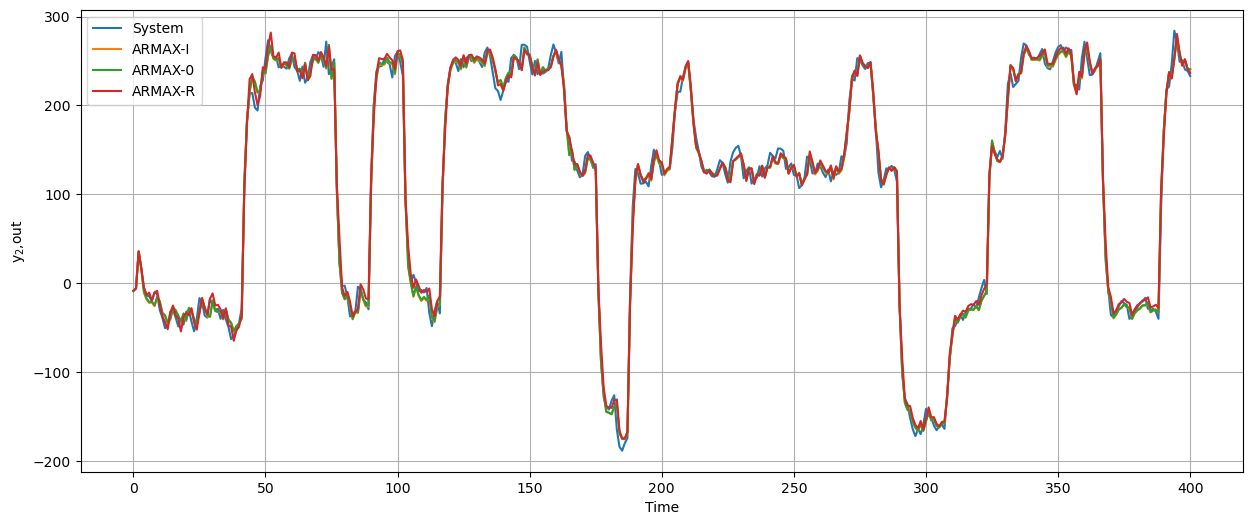

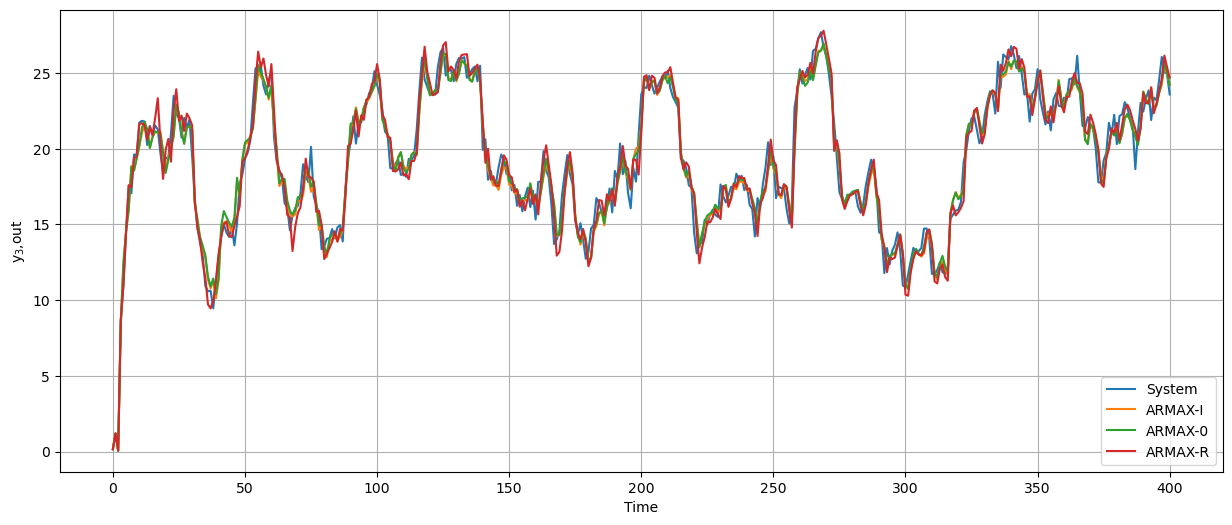

In [21]:
# Y
plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot[0, :])
plt.plot(Time, Yout_ARMAXi[0,:])
plt.plot(Time, Yout_ARMAXo[0,:])
plt.plot(Time, Yout_ARMAXr[0,:])
plt.ylabel("y$_1$,out")
plt.grid()
plt.xlabel("Time")
plt.title("Identification data")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot[1, :])
plt.plot(Time, Yout_ARMAXi[1,:])
plt.plot(Time, Yout_ARMAXo[1,:])
plt.plot(Time, Yout_ARMAXr[1,:])
plt.ylabel("y$_2$,out")
plt.grid()
plt.xlabel("Time")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot[2, :])
plt.plot(Time, Yout_ARMAXi[2,:])
plt.plot(Time, Yout_ARMAXo[2,:])
plt.plot(Time, Yout_ARMAXr[2,:])
plt.ylabel("y$_3$,out")
plt.grid()
plt.xlabel("Time")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

---
---
---

## Validation

In [22]:
# time
tfin = 400
npts = int(tfin/ts) + 1
Time = np.linspace(0, tfin, npts)

In [23]:
# (NEW) INPUTS
U_valid = np.zeros((4, npts))
Usim_noise = np.zeros((4, npts))
[U_valid[0, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [0.33, 0.7])
[U_valid[1, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [-2., -1.])
[U_valid[2, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [1.3, 2.7])
[U_valid[3, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [1., 5.2])

In [24]:
# Noise
err_inputH = np.zeros((4, npts))
err_inputH = fset.white_noise_var(npts, var_list)
err_outputH1, Time, Xsim = cnt.lsim(H_sample1, err_inputH[0, :], Time)
err_outputH2, Time, Xsim = cnt.lsim(H_sample2, err_inputH[1, :], Time)
err_outputH3, Time, Xsim = cnt.lsim(H_sample3, err_inputH[2, :], Time)

c:\ProgramData\anaconda3\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


In [25]:
# Total Output
Yout = np.zeros((3, npts))
Yout11, Time, Xsim = cnt.lsim(g_sample11, U_valid[0, :], Time)
Yout12, Time, Xsim = cnt.lsim(g_sample12, U_valid[1, :], Time)
Yout13, Time, Xsim = cnt.lsim(g_sample13, U_valid[2, :], Time)
Yout14, Time, Xsim = cnt.lsim(g_sample14, U_valid[3, :], Time)
Yout21, Time, Xsim = cnt.lsim(g_sample21, U_valid[0, :], Time)
Yout22, Time, Xsim = cnt.lsim(g_sample22, U_valid[1, :], Time)
Yout23, Time, Xsim = cnt.lsim(g_sample23, U_valid[2, :], Time)
Yout24, Time, Xsim = cnt.lsim(g_sample24, U_valid[3, :], Time)
Yout31, Time, Xsim = cnt.lsim(g_sample31, U_valid[0, :], Time)
Yout32, Time, Xsim = cnt.lsim(g_sample32, U_valid[1, :], Time)
Yout33, Time, Xsim = cnt.lsim(g_sample33, U_valid[2, :], Time)
Yout34, Time, Xsim = cnt.lsim(g_sample34, U_valid[3, :], Time)
#
Ytot1 = Yout11 + Yout12 + Yout13 + Yout14
Ytot2 = Yout21 + Yout22 + Yout23 + Yout24
Ytot3 = Yout31 + Yout32 + Yout33 + Yout34
#
Ytot_v = np.zeros((3, npts))
#
Ytot_v[0, :] = (Ytot1 + err_outputH1).squeeze()
Ytot_v[1, :] = (Ytot2 + err_outputH2).squeeze()
Ytot_v[2, :] = (Ytot3 + err_outputH3).squeeze()

In [26]:
# ## Compute time responses for identified systems with new inputs

# ARMAX - ILLS
Yv_armaxi = fset.validation(Id_ARMAXi,U_valid,Ytot_v,Time, centering = 'MeanVal')

# ARMAX - OPT
Yv_armaxo = fset.validation(Id_ARMAXo,U_valid,Ytot_v,Time)

# ARMAX - RLLS 
Yv_armaxr = fset.validation(Id_ARMAXr,U_valid,Ytot_v,Time, centering = 'InitVal')

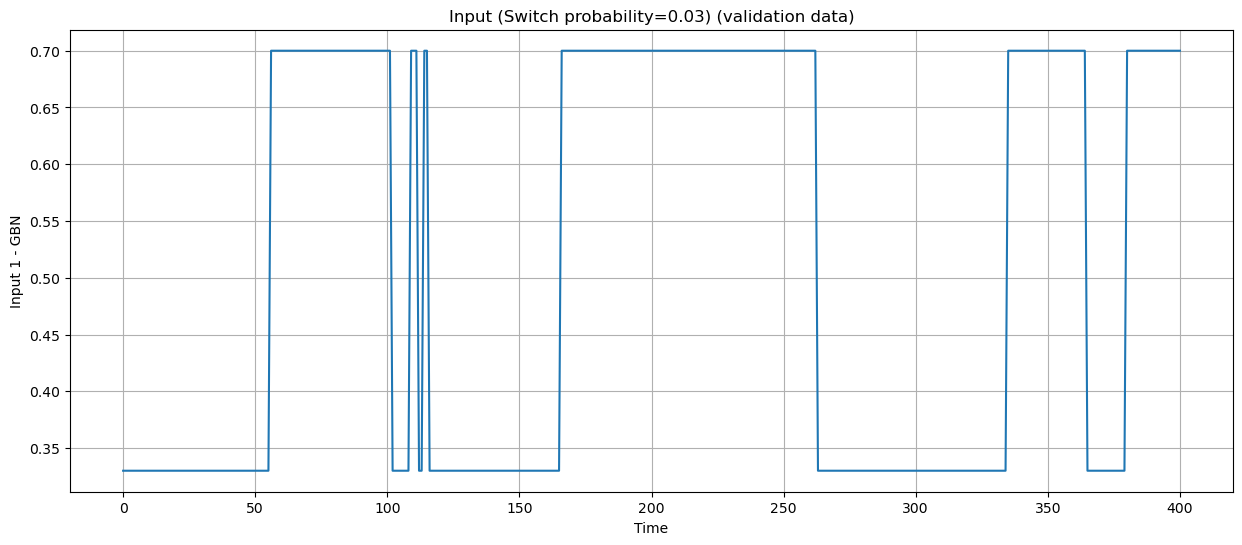

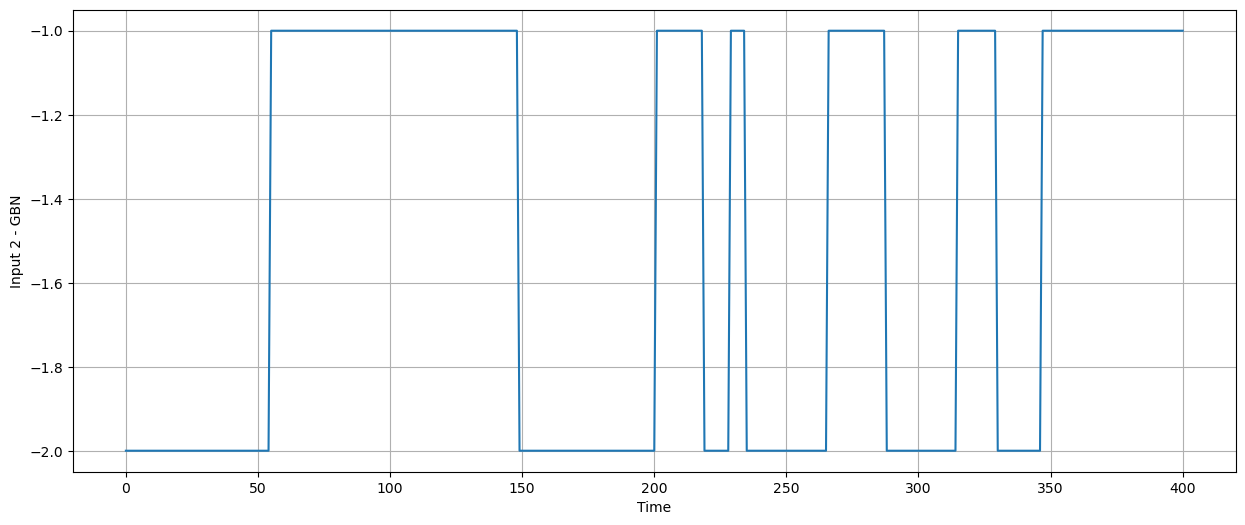

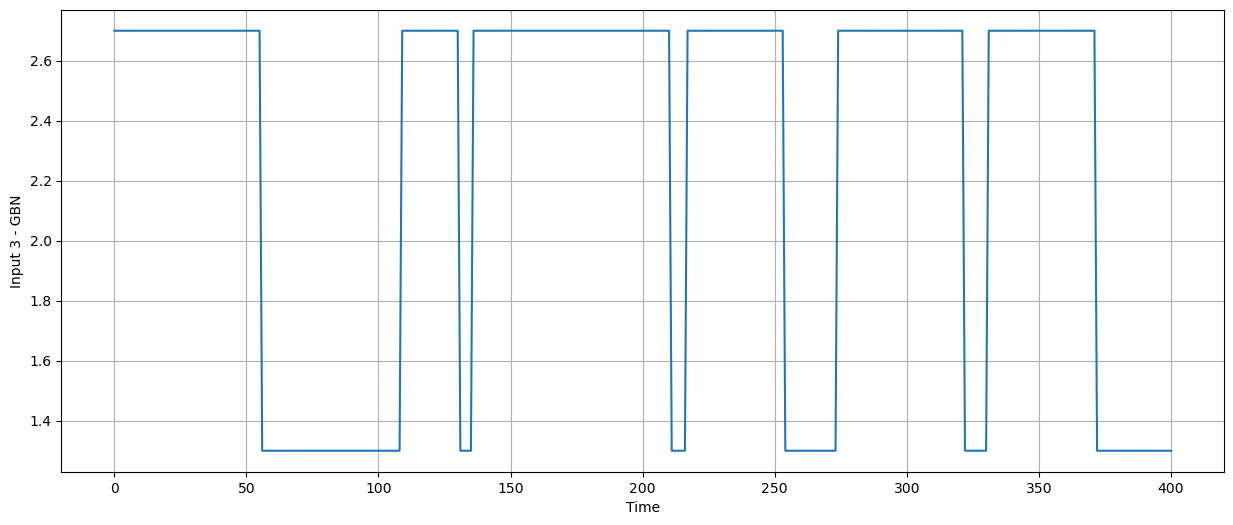

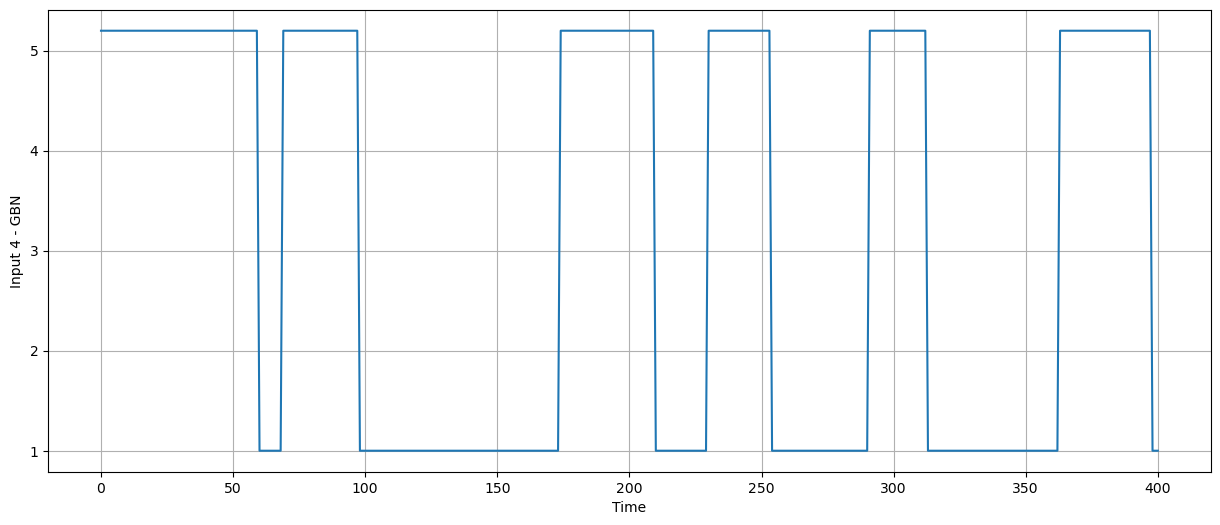

In [27]:
# U
plt.figure(figsize=(15, 6))
plt.plot(Time, U_valid[0, :])
plt.grid()
plt.ylabel("Input 1 - GBN")
plt.xlabel("Time")
plt.title("Input (Switch probability=0.03) (validation data)")
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, U_valid[1, :])
plt.ylabel("Input 2 - GBN")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, U_valid[2, :])
plt.ylabel("Input 3 - GBN")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, U_valid[3, :])
plt.ylabel("Input 4 - GBN")
plt.xlabel("Time")
plt.grid()
plt.show()

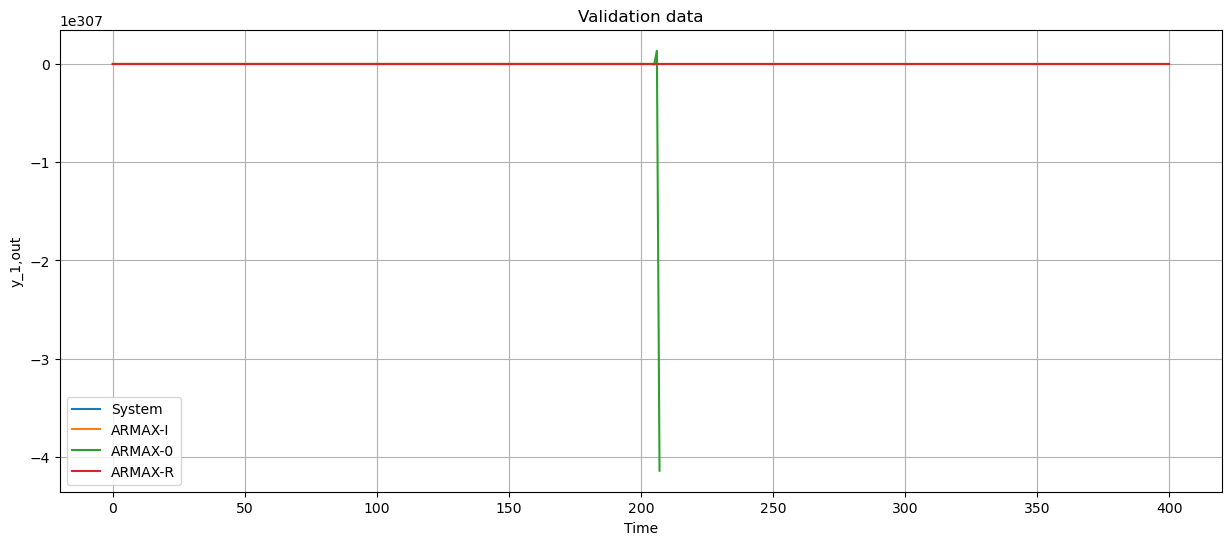

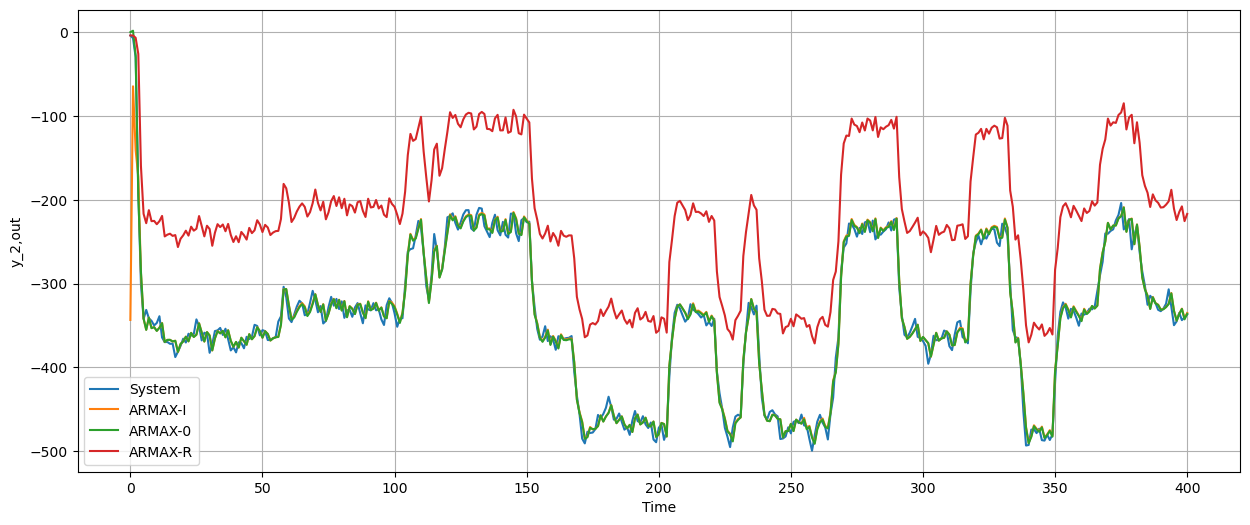

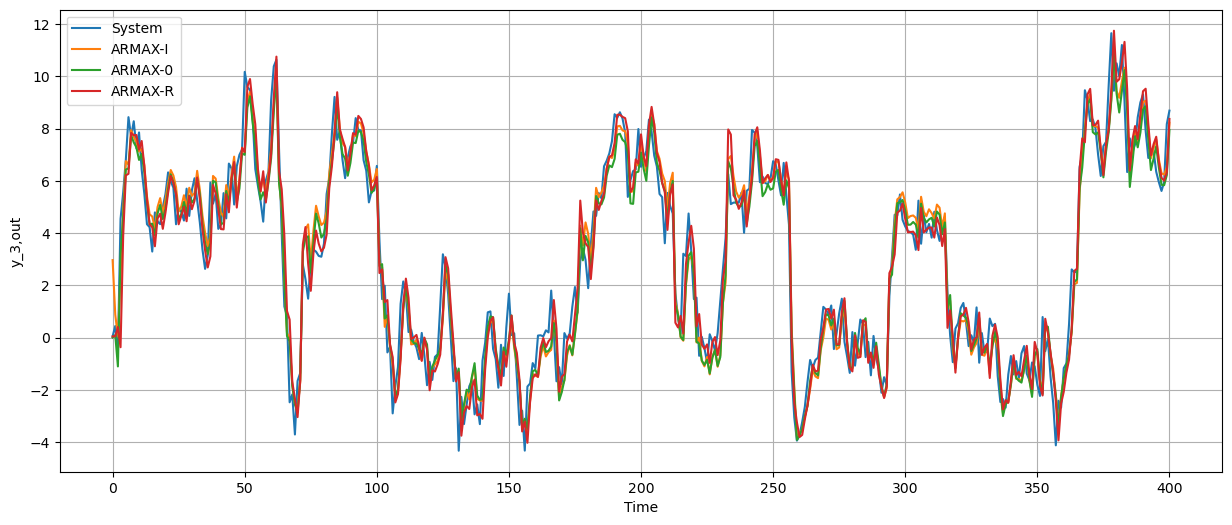

In [28]:
# Y
plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot_v[0, :])
plt.plot(Time, Yv_armaxi[0,:])
plt.plot(Time, Yv_armaxo[0,:])
plt.plot(Time, Yv_armaxr[0,:])
plt.ylabel("y_1,out")
plt.grid()
plt.xlabel("Time")
plt.title("Validation data")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot_v[1, :])
plt.plot(Time, Yv_armaxi[1,:])
plt.plot(Time, Yv_armaxo[1,:])
plt.plot(Time, Yv_armaxr[1,:])
plt.ylabel("y_2,out")
plt.grid()
plt.xlabel("Time")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(Time, Ytot_v[2, :])
plt.plot(Time, Yv_armaxi[2,:])
plt.plot(Time, Yv_armaxo[2,:])
plt.plot(Time, Yv_armaxr[2,:])
plt.ylabel("y_3,out")
plt.grid()
plt.xlabel("Time")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()